<a href="https://colab.research.google.com/github/dragon222001/Internship_Project/blob/master/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Welcome** **to** **the** **Project** **code**! 


Made by Saurabh Datta

**Project**: We are provided with a datset of various information of the users of the bank and we have to predict that how many users are more probable to take a loan from the bank as the bank wants to increase its loan takers and assets.

**Goal:** to make prediction regarding most probable customers who are likely to take loan from the bank.

For accessing the program further, first you will be required to upload the file. So, follow these steps:

1.   Go to the Git Hub Repository and download the file 'Bank_Personal_Loan_Modelling'
2.   Upload the file in the upload section given in the menu and submenu 'Files'.
3. Now, you're ready to run the code. 



**Step 1: Uploading the main libraries.**

In [1]:
#Uploading the libraries
import pandas as pd             #It is used to access and use the dataset
import numpy as np              #It is used to do array operations
import matplotlib.pyplot as plt #It is used to plot graphs and view them
import seaborn as sns            #It is used to plot heatmap graph which is used to see result accuracy in graphical manner

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Step** **2: Accessing the Dataset.** 

In [2]:
#Accessing the Dataset
dataset = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data') #It assigns the values to the variable

**Step 3: Viewing basic information about the Dataset**

In [3]:
#Viewing the information regarding the columns, null values(if any), etc.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [4]:
#Number of Null values in the data:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
#Viewing the information regarding the first 10 data entries just for verification.
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
#Viewing Statistical information regarding the data, ex:Mean, etc.
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
#Viewing the number of rows and columns for verification.
print(dataset.shape)

(5000, 14)


Hence, it is clear that our data has no null values and it consists of 5000 Rows and 14 Columns. But, one of the columns 'Experience' has faulty data i.e., it has negative value but it doesn't make any sense. So, we need to find a variable which is related to it, most probably age should be related to experience. And ID is not needed for the model as it will not effect the prediction.

**Step 4: Cleaning the Data**

Now, let us see the relation between Age and Experience.

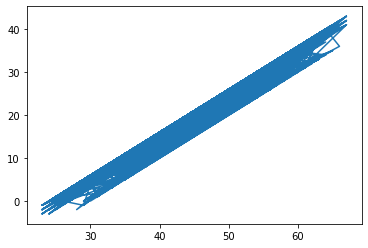

In [8]:
#Extracting Experience and Age and storing to variables
ages = dataset['Age']
experiences = dataset['Experience']

#Plotting Line graph between the two.
plt.plot(ages,experiences)
plt.show()

It is clearly visible that both are correlated. So, now let's check the degree of Correlation.

In [9]:
#Checking Correlation
correlation = experiences.corr(ages)
print(correlation)

0.9942148569683321


So, it is clearly indicated that both are highly correlated. So, we can remove the experience column as it will not make any difference until age is there. Moreover, it had faulty data. ID also needs to be dropped but let's retain it till graph plotting, afterwards, before model creation, we will  remove it as well. 

In [10]:
dataset = dataset.drop(['Experience'], axis = 1)

In [11]:
dataset

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0


**Step 5: Information regarding the columns, such as unique values, others**

In [12]:
#Number of Unique values in the columns
dataset.nunique()

ID                    5000
Age                     45
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

It will not be meaningful to view the value counts of unique values of Income, CCAvg, Mortgage and Zipcode as they have many unique values as clearly visible but we will be seeing their graphical distribution after all other fields.

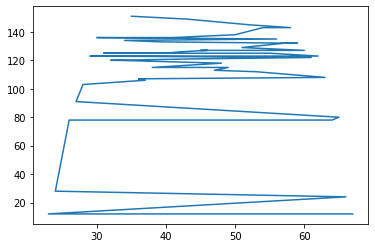

In [13]:
#Count of each type of unique values in columns
plt.plot(dataset['Age'].value_counts())
plt.show()

In [14]:
dataset['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

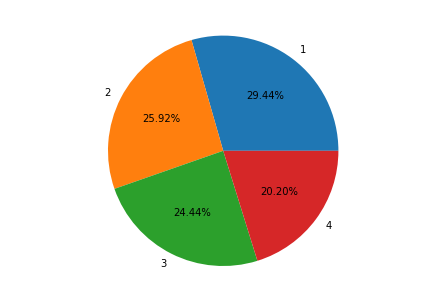

In [15]:
#Pie chart Representation of Family unique values and counts
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1','2','3','4']
ax.pie(dataset['Family'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

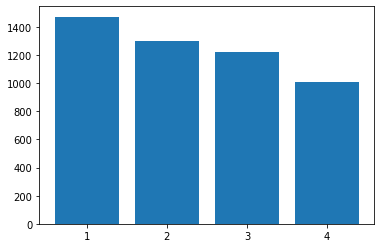

In [16]:
#Viewing this distribution in Bar Graph

plt.bar(label, dataset['Family'].value_counts())
plt.show()

In [17]:
#Now seeing unique value counts of Education in which 1: Undergraduate, 2: Graduate, 3: Advanced/Professional
dataset['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

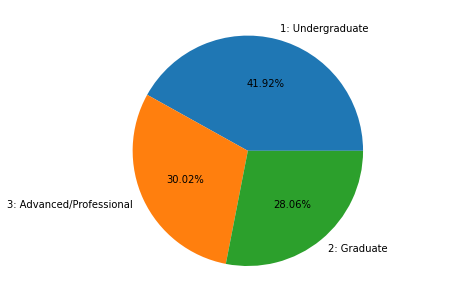

In [18]:
#Now seeing the Pie Chart of this distributuion
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1: Undergraduate','3: Advanced/Professional','2: Graduate']
ax.pie(dataset['Education'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

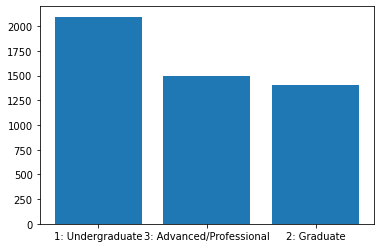

In [19]:
#Viewing the bar graph representation of this distribution
plt.bar(label, dataset['Education'].value_counts())
plt.show()

In [20]:
#Viewing Value Count of Previous Loan Taken, 0: No, 1: Yes
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

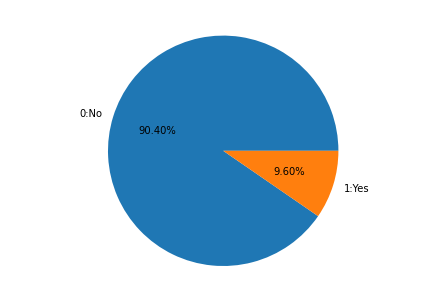

In [21]:
#Viewing this distribution in Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(dataset['Personal Loan'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

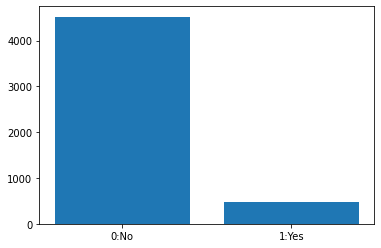

In [22]:
#Viewing this distribution in bar graph
plt.bar(label, dataset['Personal Loan'].value_counts())
plt.show()

In [23]:
#Viewing the distribution of Whether the customer has a security account with the bank, 1:yes, 0:no
dataset['Securities Account'].value_counts() 

0    4478
1     522
Name: Securities Account, dtype: int64

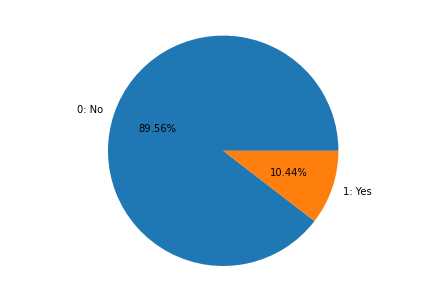

In [24]:
#Viewing Pie Chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0: No', '1: Yes']
ax.pie(dataset['Securities Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

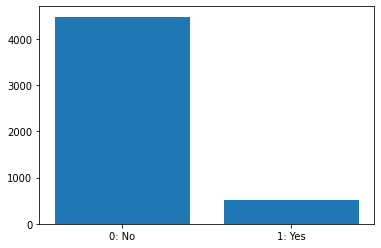

In [25]:
#Viewing the bar graph of this distribution
plt.bar(label, dataset['Securities Account'].value_counts())
plt.show()

In [26]:
#Viewing the distribution of whether the customer has a CD Account with the bank, 0:No, 1:Yes
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

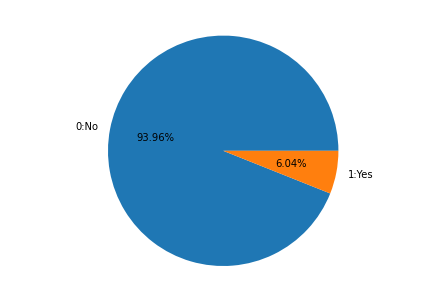

In [27]:
#Viewing the pie chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(dataset['CD Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

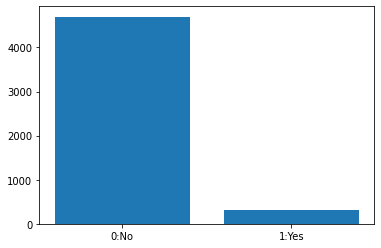

In [28]:
#Viewing the Bar Chart of this distribution
plt.bar(label,dataset['CD Account'].value_counts())
plt.show()

In [29]:
#Viewing the distribution of whether the customer uses online banking, 0:no, 1:yes
dataset['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

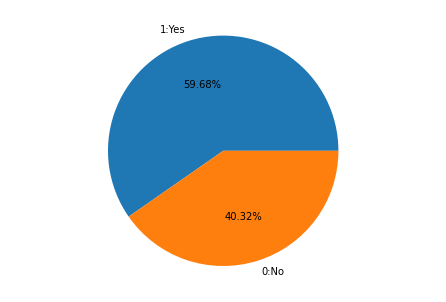

In [30]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1:Yes','0:No']
ax.pie(dataset['Online'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()


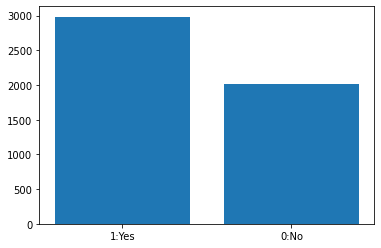

In [31]:
#Viewing the bar chart representation of this data
plt.bar(label, dataset['Online'].value_counts())
plt.show()

In [32]:
#Viewing the distribution whether a person uses a Credit Card by Universal Bank, 0:No, 1:Yes
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

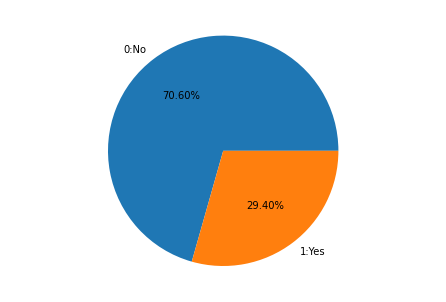

In [33]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(dataset['CreditCard'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

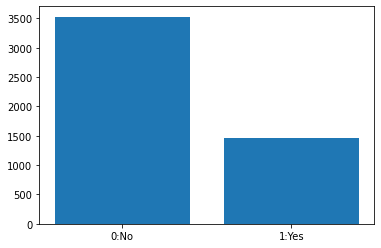

In [34]:
#Viewing Bar Chart Representation of this data
plt.bar(label, dataset['CreditCard'].value_counts())
plt.show()

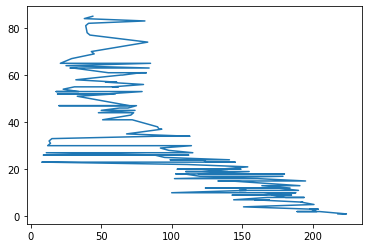

In [35]:
#Viewing the distribution related to Income through Graph
plt.plot(dataset['Income'].value_counts())
plt.show()

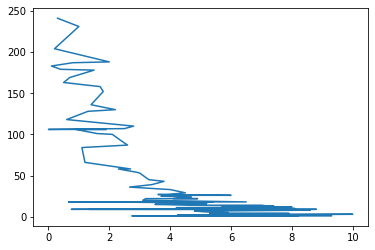

In [36]:
#Viewing the distribution related to Average Credit Card Spending per Month
plt.plot(dataset['CCAvg'].value_counts())
plt.show()

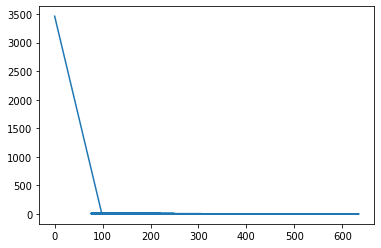

In [37]:
#Viewing the distribution of Mortgage 
plt.plot(dataset['Mortgage'].value_counts())
plt.show()

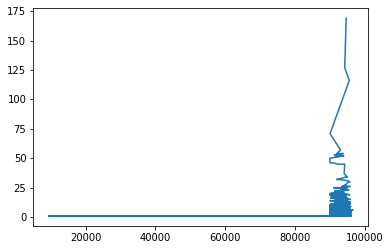

In [38]:
#Viewing the distribution of Zipcodes
plt.plot(dataset['ZIP Code'].value_counts())
plt.show()

Now, let us see the customers with zero mortgage.

In [39]:
y_mor = 0
for x_mor in dataset['Mortgage']:
  if x_mor == 0:
    y_mor+=1
print(y_mor)

3462


Now, let us see number of users with zero credit card spending.

In [40]:
y_CC = 0
for x_CC in dataset['CCAvg']:
  if x_CC == 0:
    y_CC+=1
print(y_CC)

106


**Step 5: Viewing the Graphical Representation of the Data.**

In [41]:
#Extracting ID's of the customer and storing in a variable to use it for plotting with other fields
ids = dataset['ID']

   (i) Graphical Representation of Ages of the customers.

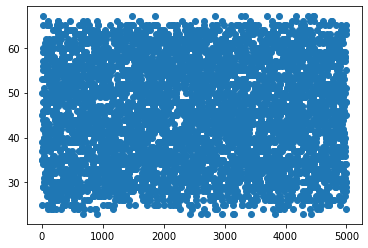

In [42]:

#Plotting Scatter Plot
plt.scatter(ids,ages)
plt.show()

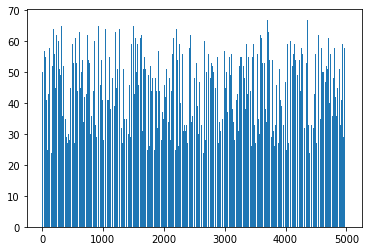

In [43]:
#Plotting Bar Graph
plt.bar(ids,ages)
plt.show()

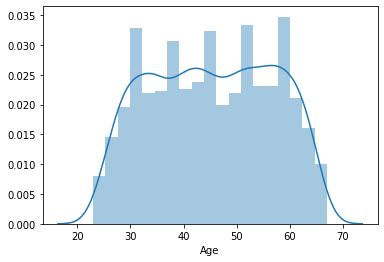

In [44]:
#Plotting variance of age
sns.distplot(ages)
plt.show()

It seems a normal curve.

(ii) Graphical Representation of incomes of customers

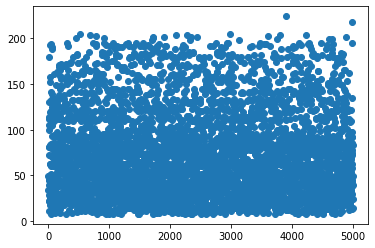

In [45]:
#Extracting the incomes of customers and saving it to a variable.
incomes = dataset['Income']

#Plotting Scatter Plot
plt.scatter(ids, incomes)
plt.show()

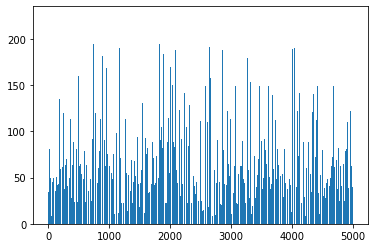

In [46]:
#Plotting the Bar Graph
plt.bar(ids, incomes)
plt.show()

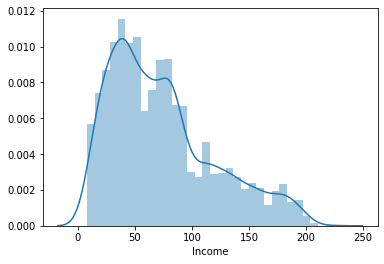

In [47]:
#Variance of incomes
sns.distplot(incomes)
plt.show()

So, it seems to be skewed.

(iii) For Zipcodes

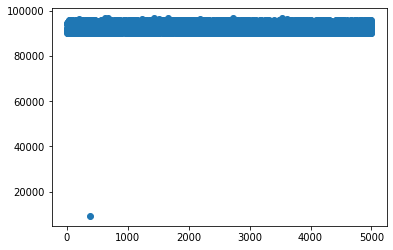

In [48]:
#Extracting Zipcodes and saving in a variable
zipcodes= dataset['ZIP Code']

plt.scatter(ids,zipcodes)
plt.show()

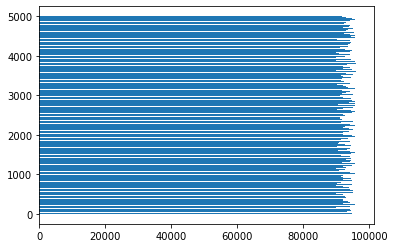

In [49]:
plt.barh(ids,zipcodes)
plt.show()

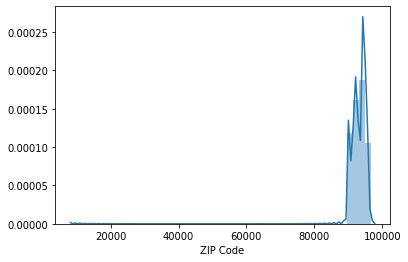

In [50]:
#Variance
sns.distplot(zipcodes)
plt.show()

(iv) Family size

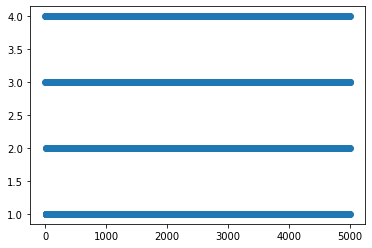

In [51]:
#Extracting Family members and saving to a variable.
families = dataset['Family']

#Plotting Scatter Plot
plt.scatter(ids, families)
plt.show()

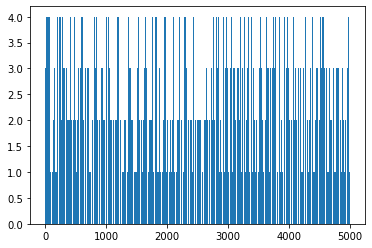

In [52]:
#Plotting Bar Graph
plt.bar(ids, families)
plt.show() 

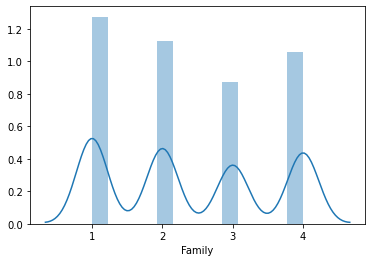

In [53]:
#Variance
sns.distplot(families)
plt.show()

(v) Graphical Representation of Average spendings of customers monthly using credit card.

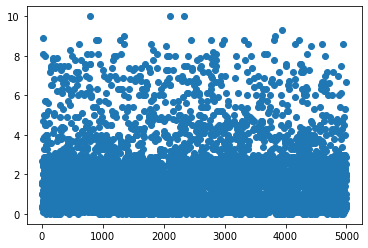

In [54]:
#Extracting the values to a variable.
ccavgs = dataset['CCAvg']

#Plotting Scatter Plot
plt.scatter(ids, ccavgs)
plt.show()

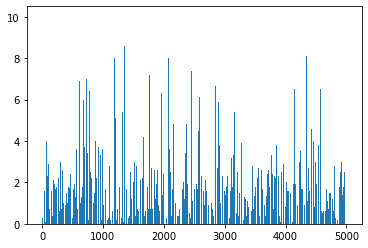

In [55]:
#Plotting Bar Graph
plt.bar(ids, ccavgs)
plt.show()

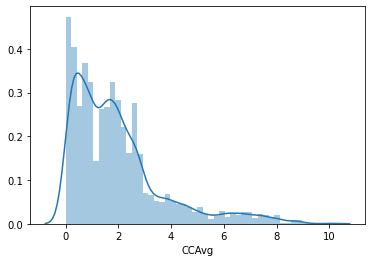

In [56]:
sns.distplot(ccavgs)
plt.show()

It too apears skewed.

(vi) Education levels

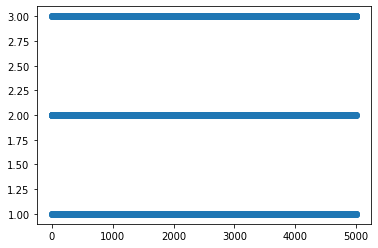

In [57]:
#Extracting Education levels and storing in a variable
educations = dataset['Education']

plt.scatter(ids,educations)
plt.show()

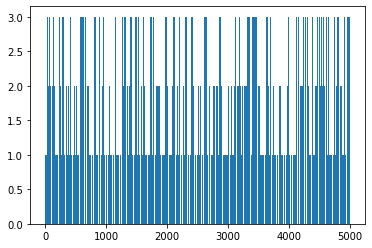

In [58]:
plt.bar(ids,educations)
plt.show()

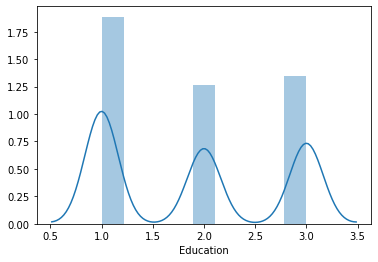

In [59]:
sns.distplot(educations)
plt.show()

(Vii) Mortgages

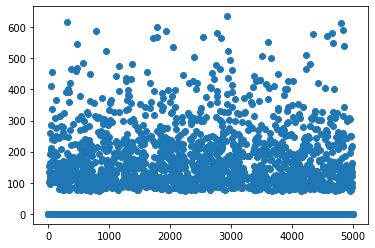

In [60]:
#Extracting mortgages and saving in a variable
mortgages = dataset['Mortgage']

plt.scatter(ids, mortgages)
plt.show()

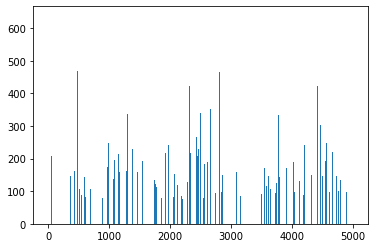

In [61]:
plt.bar(ids,mortgages)
plt.show()

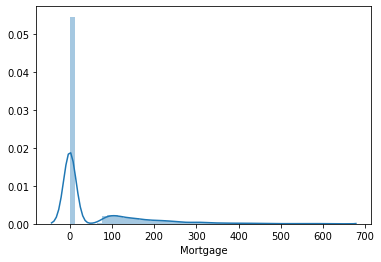

In [62]:
sns.distplot(mortgages)
plt.show()

(viii) Personal Loan

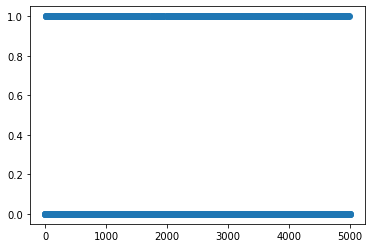

In [63]:
#Extracting whether the person took a loan to a variable
loans= dataset['Personal Loan']

plt.scatter(ids,loans)
plt.show()

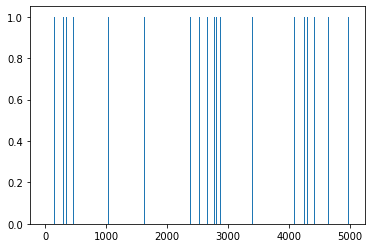

In [64]:
plt.bar(ids,loans)
plt.show()

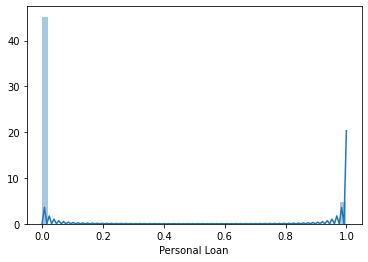

In [65]:
sns.distplot(loans)
plt.show()

(ix) Security account

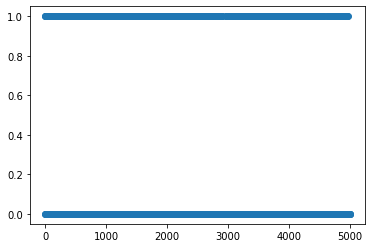

In [66]:
#Extracting whether person has security account with bank to a variable
securities = dataset['Securities Account']

plt.scatter(ids,securities)
plt.show()

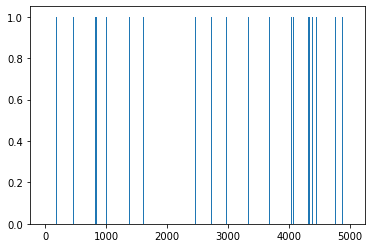

In [67]:
plt.bar(ids,securities)
plt.show()

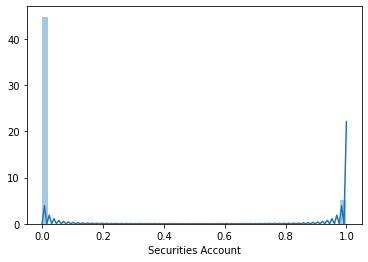

In [68]:
sns.distplot(securities)
plt.show()

(x) CD Account

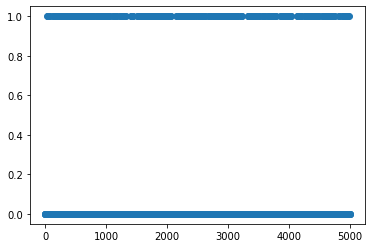

In [69]:
#Extracting whether customer has CD Account or not to a variable
cdaccs= dataset['CD Account']

plt.scatter(ids, cdaccs)
plt.show()

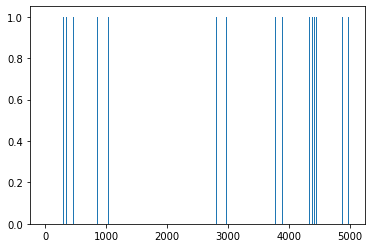

In [70]:
plt.bar(ids, cdaccs)
plt.show()

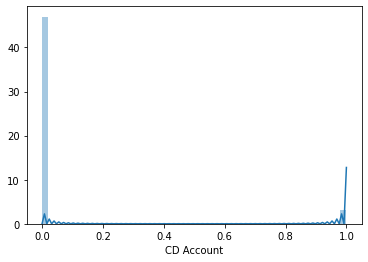

In [71]:
sns.distplot(cdaccs)
plt.show()

(xi) Online Facility

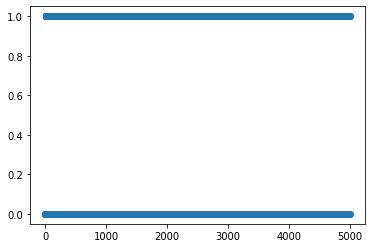

In [72]:
#Extracting whether customer uses online facilities to a variable
onlines = dataset['Online']

plt.scatter(ids,onlines)
plt.show()

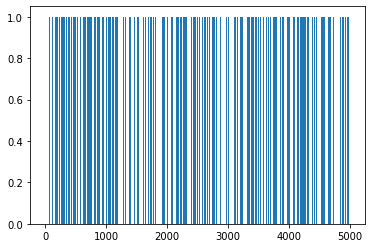

In [73]:
plt.bar(ids,onlines)
plt.show()

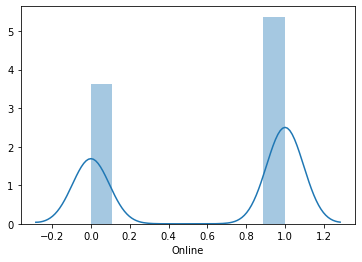

In [74]:
sns.distplot(onlines)
plt.show()

(xii) Credit card by Universal Bank

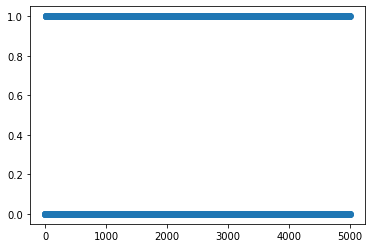

In [75]:
#Extracting whether user has Credit Card issued by Universal Bank
creditcards = dataset['CreditCard']

plt.scatter(ids,creditcards)
plt.show()

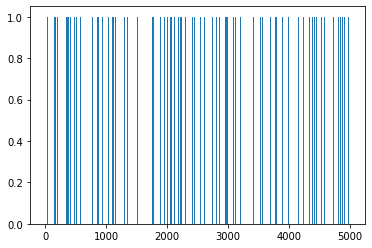

In [76]:
plt.bar(ids,creditcards)
plt.show()

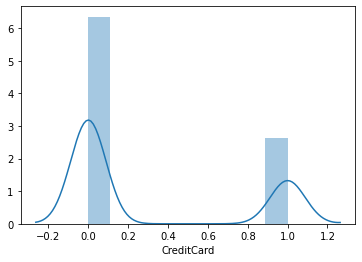

In [77]:
sns.distplot(creditcards)
plt.show()

Based on the above observations, we can conclude that certain fields need to be processed before use.



Now, let us see the relational graphs between variables which may be related.

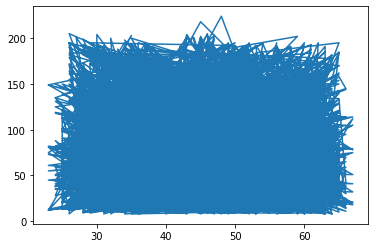

In [78]:
#Relation between age and income
plt.plot(ages,incomes)
plt.show()

So, it is clear that they are not related.

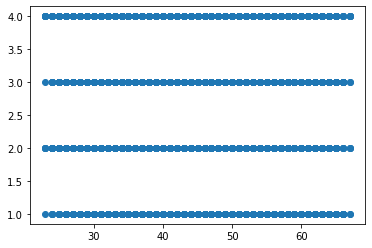

In [79]:
#Relation between age and family size
plt.scatter(ages,families)
plt.show()

They too are not related.

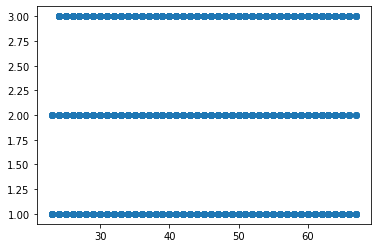

In [80]:
#Relation between age and education
plt.scatter(ages,educations)
plt.show()

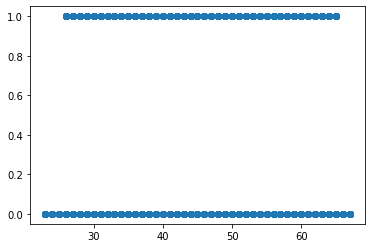

In [81]:
#Relation between Age and Personal Loan
plt.scatter(ages,loans)
plt.show()

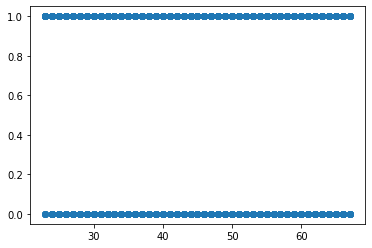

In [82]:
#Relation between Age and Online facilities
plt.scatter(ages,onlines)
plt.show()

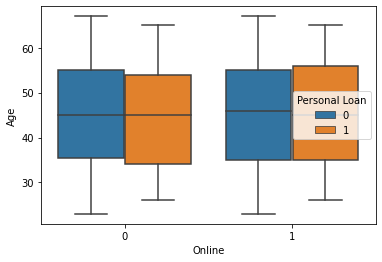

In [83]:
sns.boxplot(x='Online', y='Age',hue='Personal Loan',data=dataset)
plt.show()

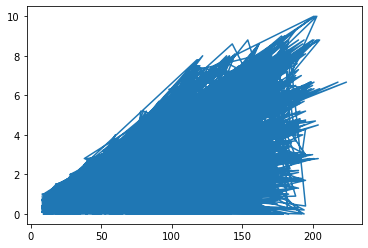

In [84]:
#Relation between Income and Average spending
plt.plot(incomes,ccavgs)
plt.show()

They seem to be related to some extent.

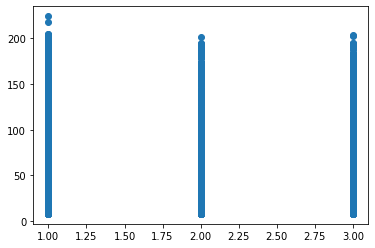

In [85]:
#Relation between Income and Education
plt.scatter(educations,incomes)
plt.show()

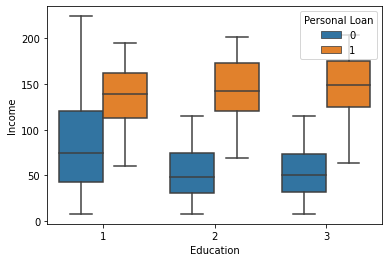

In [86]:
sns.boxplot(x='Education', y='Income',hue='Personal Loan',data=dataset)
plt.show()

So, it is visible that people with high education and high income tend to be more probable in taking loan.

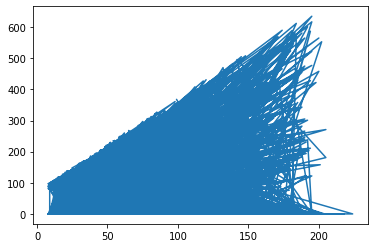

In [87]:
#Relation between Income and Mortgage value
plt.plot(incomes,mortgages)
plt.show()

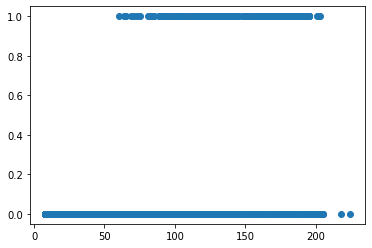

In [88]:
#Relation between Income and Personal Loan
plt.scatter(incomes,loans)
plt.show()

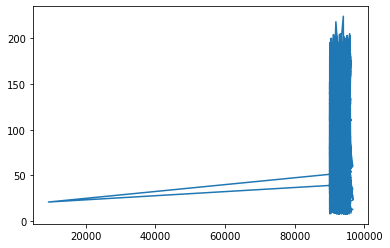

In [89]:
#Relation between Zip codes and incomes
plt.plot(zipcodes,incomes)
plt.show()

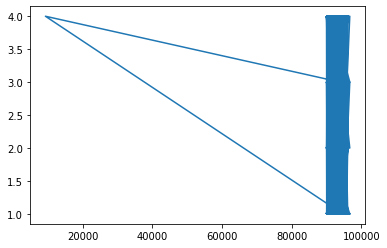

In [90]:
#Relation between zipcodes and family size
plt.plot(zipcodes,families)
plt.show()

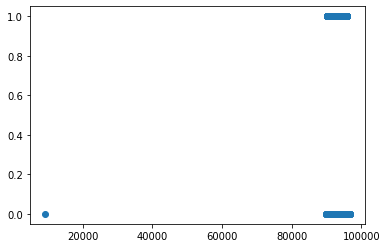

In [91]:
#Plotting relation between zipcode and loan
plt.scatter(zipcodes,loans)
plt.show()

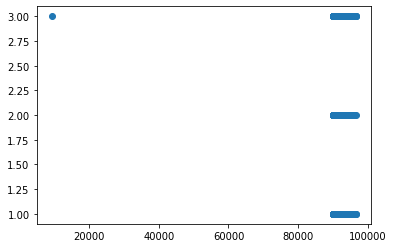

In [92]:
#Relation between zipcode and education
plt.scatter(zipcodes,educations)
plt.show()

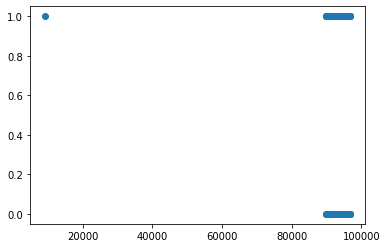

In [93]:
#Relation between zipcode and online
plt.scatter(zipcodes,onlines)
plt.show()

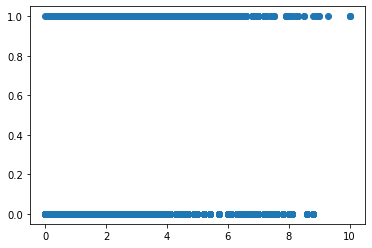

In [94]:
#Relation between average credit card spending per month and loan
plt.scatter(ccavgs,loans)
plt.show()

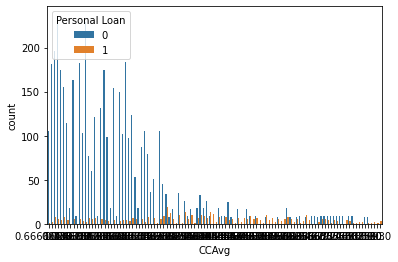

In [95]:
sns.countplot(x='CCAvg',hue='Personal Loan',data=dataset)
plt.show()

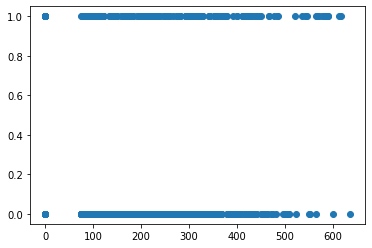

In [96]:
#Relation between mortgages and loan
plt.scatter(mortgages,loans)
plt.show()

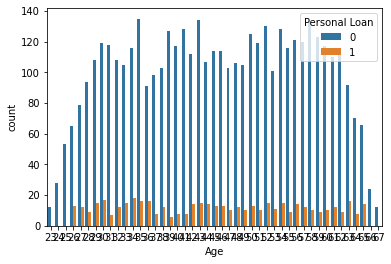

In [97]:
#Relation between Ages and loans
sns.countplot(x='Age',hue='Personal Loan',data=dataset)
plt.show()

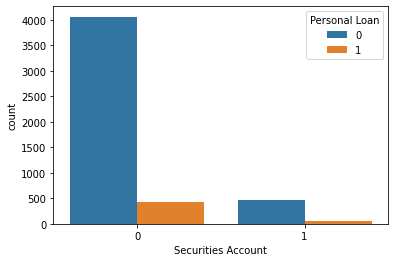

In [98]:
#Relation between security account and Loan
sns.countplot(x='Securities Account',hue='Personal Loan',data=dataset)
plt.show()

It is visible that people with security accounts tend less to take loans.

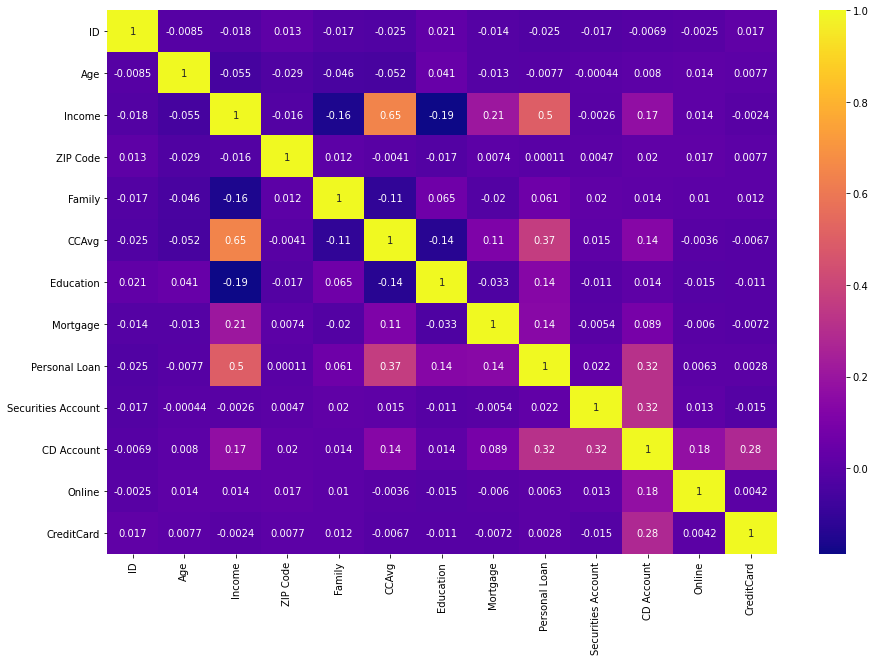

In [99]:
#Correlations Plot
fig.ax=plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='plasma',annot=True)
plt.show()

So, we have seen relations between various datas.

**Step 6: Preprocessing of Data**

Before the data can be used, we need to do some necessary stransformations to the data. For example, we need to remove the data of zipcodes as it is nominal data and has too many types so it can effect the predictions.

In [100]:
#Dropping ID's
dataset = dataset.drop(['ID'], axis=1)
dataset

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


In [101]:
#Dropping Zipcodes
dataset = dataset.drop(['ZIP Code'], axis=1)
dataset

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**Step 7:Extracting Target and Training Variable**

Now, let us extract Training variable (X) and Target Variable (Y)

In [102]:
X=dataset.loc[:,dataset.columns != 'Personal Loan']
Y=dataset[['Personal Loan']]


In [103]:
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


In [104]:
Y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


**Step 8: Normalization of Data**

Now, that we have preprocessed the data, it requires to be normalized which means to covert the data into its equivalent form of normal data so that it increases the accuracy of our predictions. 
I tried boxcox and yeo-johnson method of normalization and found the latter to be better. Hence, we will be using it. And we will be using label encoding on Mortgage to transform it as it seems highly skewed.

In [105]:
#Normalising Income
from sklearn.preprocessing import PowerTransformer
pt_inc = PowerTransformer(method='yeo-johnson',standardize=False)
pt_inc.fit(X['Income'].values.reshape(-1,1))
temp = pt_inc.transform(X['Income'].values.reshape(-1,1))

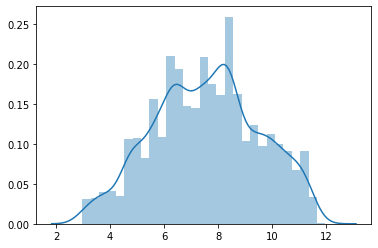

In [106]:
sns.distplot(temp)
plt.show()

Now, Income does look normalized and ready for use.

In [107]:
#Normalizing Credit Card Average
pt_cc = PowerTransformer(method='yeo-johnson',standardize=False)
pt_cc.fit(X['CCAvg'].values.reshape(-1,1))
temp = pt_cc.transform(X['CCAvg'].values.reshape(-1,1))

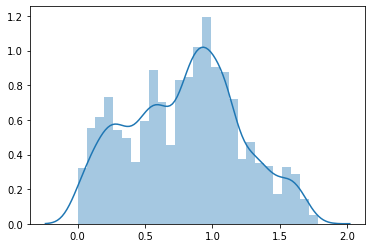

In [108]:
sns.distplot(temp)
plt.show()

Now, it too looks normalized and ready for use.

In [109]:
#Transforming Mortgage through Label Encoding
X['Mortgage_New']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop(['Mortgage'], axis=1, inplace=True)

In [110]:
X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


So now, Our data seems ready for use for predictions. So, let us proceed.

**Step 9: Splitting the data into training and test set**

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=0)

In [112]:
X_train

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
3789,51,24,3,0.4,1,0,0,1,1,0
758,64,35,1,1.5,2,1,0,0,0,0
2868,52,31,4,1.8,1,0,0,1,1,0
2550,32,20,1,0.5,3,0,0,1,0,1
2150,62,54,1,0.8,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3597,56,51,3,2.0,3,0,0,1,0,0
4670,52,194,1,1.7,1,0,0,1,0,0
988,63,32,1,1.9,2,0,0,0,0,0
2037,35,52,2,1.0,2,0,0,0,1,0


In [113]:
X_test

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
9,34,180,1,8.9,3,0,0,0,0,0
461,55,81,2,3.7,1,1,0,0,0,0
3700,48,128,1,5.7,1,1,0,0,0,0
1559,59,102,4,3.0,2,0,0,1,0,1
4558,44,82,2,0.4,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2180,58,42,2,1.6,3,0,0,1,0,0
3484,45,53,3,2.5,2,0,0,0,0,1
2965,53,31,2,0.4,3,0,0,0,1,1
2493,34,49,1,2.5,3,0,0,0,0,0


In [114]:
Y_train

,Personal Loan
3789,0
758,0
2868,0
2550,0
2150,0
...,...
3597,0
4670,0
988,0
2037,0


In [115]:
Y_test

,Personal Loan
9,1
461,0
3700,0
1559,1
4558,0
...,...
2180,0
3484,0
2965,0
2493,0


So, now our data has been split into training and test set which means we are good to go ahead.

**Step 10: Logistic Regression Model**

In [123]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [124]:
#Fitting the data
log_reg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
#Making the predictions
Y_pred_LR = log_reg.predict(X_test)

In [119]:
#Viewing Confusion Matrix of the Prediction
confusion_matrix = pd.crosstab(Y_test,Y_pred_LR)
confusion_matrix

ValueError: ignored